<a href="https://colab.research.google.com/github/adhamrait/uncategorized_projects/blob/main/AM160_HW2_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

## Part A

## Generate Data



In [ ]:
K = 8
J = 8
I = 8
h=.5
c=8
F=20
max_t = 750
dt = .005
tvec = dt * np.array(range(0, int(max_t / dt)))
np.random.seed(65)


X_vec = np.random.randint(-5, 5, (8,))
Y_mat = np.random.randn(J, K)

# Z_mat=.05*np.random.randn(J,K,I)

# X_vec=np.array([-3,-8,5,-4,3,-3,5,0])
# Y_mat=np.ones((8,8))
Z_mat = .05 * np.random.randn(8, 8, 8)

x_store = np.zeros((int(max_t / dt), K))
y_store = np.zeros((int(max_t / dt), int(K*J)))


def step(x_vec, y_mat, z_mat):
    b = 10
    e = 10
    d = 10
    minus = [-1, 0, 1, 2, 3, 4, 5, 6]
    minus2 = [-2, -1, 0, 1, 2, 3, 4, 5]
    plus = [1, 2, 3, 4, 5, 6, 7, 0]
    plus2 = [2, 3, 4, 5, 6, 7, 0, 1]
    x_minus = x_vec[minus]
    x_minus2 = x_vec[minus2]
    x_plus = x_vec[plus]

    y_minus = y_mat[minus, :]
    y_plus = y_mat[plus, :]
    y_plus2 = y_mat[plus2, :]

    z_minus = z_mat[minus, :, :]
    z_minus2 = z_mat[minus2, :, :]
    z_plus = z_mat[plus, :, :]

    y_k = np.sum(y_mat, 0)

    z_kj = np.sum(z_mat, 0)

    dx = x_minus * (x_plus - x_minus2) - x_vec + F - (h * c / b) * y_k

    dy = -c * b * y_plus * (y_plus2 - y_minus) - c * y_mat + (h * c / b) * x_vec - (h * e / d) * z_kj

    dz = e * d * z_minus * (z_plus - z_minus2) - e * z_mat + (h * e / d) * y_mat
    return dx, dy, dz


for i in range(int(max_t/dt)):

    [dx1, dy1, dz1] = step(X_vec,Y_mat,Z_mat)

    Rx2=X_vec+.5*dt*dx1
    Ry2=Y_mat+.5*dt*dy1
    Rz2=Z_mat+.5*dt*dz1

    [dx2, dy2, dz2] = step(Rx2,Ry2,Rz2)

    Rx3=X_vec+.5*dt*dx2
    Ry3=Y_mat+.5*dt*dy2
    Rz3=Z_mat+.5*dt*dz2

    [dx3, dy3, dz3] = step(Rx3,Ry3,Rz3)

    Rx4=X_vec+dt*dx3
    Ry4=Y_mat+dt*dy3
    Rz4=Z_mat+dt*dz3

    [dx4, dy4, dz4] = step(Rx4,Ry4,Rz4)
    X_vec=X_vec+dt/6*(dx1 + 2*dx2 + 2*dx3 + dx4)
    Y_mat=Y_mat+dt/6*(dy1 + 2*dy2 + 2*dy3 + dy4)
    Z_mat=Z_mat+dt/6*(dz1 + 2*dz2 + 2*dz3 + dz4)

    x_store[i,:]=X_vec

    y_store[i,:]=Y_mat.reshape((int(J*K),),order='F')


print('c='+str(c)+' h='+str(h)+' F='+str(F))
print('y_mean: ')
print(np.mean(y_store))
print('y_std: ')
print(np.std(y_store))
print('x_mean: ')
print(np.mean(x_store))
print('x_std: ')
print(np.std(x_store))

data=np.vstack((x_store.transpose(),y_store.transpose()))
y_norm=(y_store-np.mean(y_store))/np.std(y_store)
x_norm=(x_store-np.mean(x_store))/np.std(x_store)
data_norm=np.vstack((x_norm.transpose(),y_norm.transpose()))
print(data_norm.shape)

c=8 h=0.5 F=20
y_mean: 
0.11872803137886534
y_std: 
0.24571661996957656
x_mean: 
3.411150777121997
x_std: 
7.189868676030367
(72, 150000)


shape of X (150000, 8)
shape of Y (150000, 64)


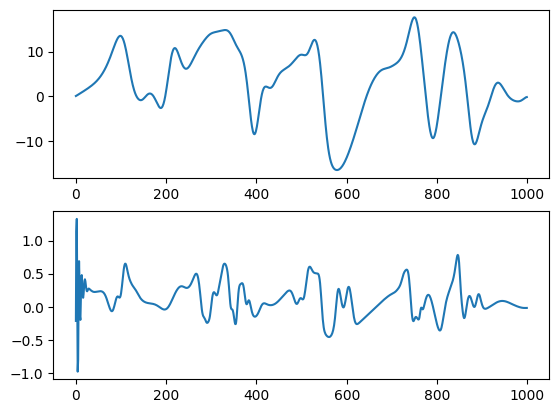

In [ ]:
print('shape of X', np.shape(x_store))
print('shape of Y', np.shape(y_store))

plt.subplot(2,1,1)
plt.plot(x_store[0:1000,0])

plt.subplot(2,1,2)
plt.plot(y_store[0:1000,0])

## Prep data and NN

In [ ]:
X_tensor = torch.tensor(x_store, dtype=torch.float32)
Y_tensor = torch.tensor(y_store, dtype=torch.float32)

indices = np.random.permutation(np.arange(start=0, stop=X_tensor.size()[0]))

X_tensor = X_tensor[indices]
Y_tensor = Y_tensor[indices]

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 128)  # Input layer: 8 -> 128
        self.fc2 = nn.Linear(128, 256)  # Hidden layer: 128 -> 256
        self.fc3 = nn.Linear(256, 256)  # Hidden layer: 128 -> 256
        self.fc4 = nn.Linear(256, 256)  # Hidden layer: 128 -> 256
        self.fc5 = nn.Linear(256, 64)  # Output layer: 256 -> 64

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
net = Net().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Train NN

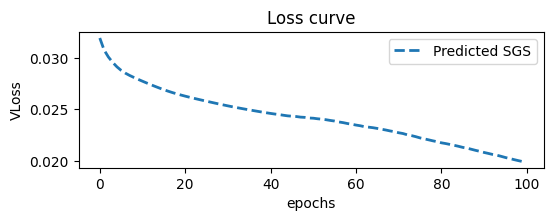

In [ ]:
batch_size = 100
trainN = 10000
# Train the network
num_epochs = 100
LOSS = []

for epoch in range(num_epochs):
    for iter in range (0, trainN, batch_size):
        batch_X = X_tensor[iter:iter+batch_size,:]
        batch_Y = Y_tensor[iter:iter+batch_size,:]
        optimizer.zero_grad()
        outputs = net(batch_X.cuda().float())
        loss = criterion(outputs, batch_Y.cuda().float())
        loss.backward()
        optimizer.step()
    LOSS.append(loss.detach().cpu().numpy())
plt.figure(figsize=(6, 6))
plt.subplot(3,1,3)
plt.plot(LOSS, '--', label='Predicted SGS', linewidth=2)
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('VLoss')
plt.legend()
plt.show()

## Analyze NN

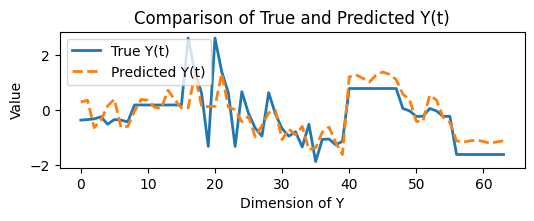

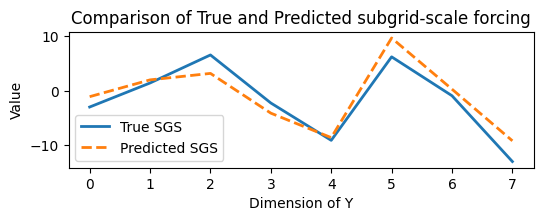

In [ ]:
# Test the network on a sample
sample_id = trainN + 50
sample_X = X_tensor[sample_id]  # Take the first sample
predicted_Y = net(sample_X.float().cuda()).detach().cpu().numpy()

compute_SGS = lambda K: np.sum(K.reshape(8, 8), axis=1)

predicted_SGS = compute_SGS(predicted_Y)
true_SGS = compute_SGS(Y_tensor[sample_id, :].numpy())


plt.figure(figsize=(6, 6))

plt.subplot(3,1,1)
plt.plot(Y_tensor[sample_id, :], label='True Y(t)', linewidth=2)
plt.plot(predicted_Y, '--', label='Predicted Y(t)', linewidth=2)
plt.title('Comparison of True and Predicted Y(t)')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.subplot(3,1,2)
plt.plot(true_SGS, label='True SGS', linewidth=2)
plt.plot(predicted_SGS, '--', label='Predicted SGS', linewidth=2)
plt.title('Comparison of True and Predicted subgrid-scale forcing')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()

# Part B

## Generate new data

In [ ]:
F=24
np.random.seed(65)


X_vec = np.random.randint(-5, 5, (8,))
Y_mat = np.random.randn(J, K)

# Z_mat=.05*np.random.randn(J,K,I)

# X_vec=np.array([-3,-8,5,-4,3,-3,5,0])
# Y_mat=np.ones((8,8))
Z_mat = .05 * np.random.randn(8, 8, 8)

x_store = np.zeros((int(max_t / dt), K))
y_store = np.zeros((int(max_t / dt), int(K*J)))


def step(x_vec, y_mat, z_mat):
    b = 10
    e = 10
    d = 10
    minus = [-1, 0, 1, 2, 3, 4, 5, 6]
    minus2 = [-2, -1, 0, 1, 2, 3, 4, 5]
    plus = [1, 2, 3, 4, 5, 6, 7, 0]
    plus2 = [2, 3, 4, 5, 6, 7, 0, 1]
    x_minus = x_vec[minus]
    x_minus2 = x_vec[minus2]
    x_plus = x_vec[plus]

    y_minus = y_mat[minus, :]
    y_plus = y_mat[plus, :]
    y_plus2 = y_mat[plus2, :]

    z_minus = z_mat[minus, :, :]
    z_minus2 = z_mat[minus2, :, :]
    z_plus = z_mat[plus, :, :]

    y_k = np.sum(y_mat, 0)

    z_kj = np.sum(z_mat, 0)

    dx = x_minus * (x_plus - x_minus2) - x_vec + F - (h * c / b) * y_k

    dy = -c * b * y_plus * (y_plus2 - y_minus) - c * y_mat + (h * c / b) * x_vec - (h * e / d) * z_kj

    dz = e * d * z_minus * (z_plus - z_minus2) - e * z_mat + (h * e / d) * y_mat
    return dx, dy, dz


for i in range(int(max_t/dt)):

    [dx1, dy1, dz1] = step(X_vec,Y_mat,Z_mat)

    Rx2=X_vec+.5*dt*dx1
    Ry2=Y_mat+.5*dt*dy1
    Rz2=Z_mat+.5*dt*dz1

    [dx2, dy2, dz2] = step(Rx2,Ry2,Rz2)

    Rx3=X_vec+.5*dt*dx2
    Ry3=Y_mat+.5*dt*dy2
    Rz3=Z_mat+.5*dt*dz2

    [dx3, dy3, dz3] = step(Rx3,Ry3,Rz3)

    Rx4=X_vec+dt*dx3
    Ry4=Y_mat+dt*dy3
    Rz4=Z_mat+dt*dz3

    [dx4, dy4, dz4] = step(Rx4,Ry4,Rz4)
    X_vec=X_vec+dt/6*(dx1 + 2*dx2 + 2*dx3 + dx4)
    Y_mat=Y_mat+dt/6*(dy1 + 2*dy2 + 2*dy3 + dy4)
    Z_mat=Z_mat+dt/6*(dz1 + 2*dz2 + 2*dz3 + dz4)

    x_store[i,:]=X_vec

    y_store[i,:]=Y_mat.reshape((int(J*K),),order='F')


print('c='+str(c)+' h='+str(h)+' F='+str(F))
print('y_mean: ')
print(np.mean(y_store))
print('y_std: ')
print(np.std(y_store))
print('x_mean: ')
print(np.mean(x_store))
print('x_std: ')
print(np.std(x_store))

data=np.vstack((x_store.transpose(),y_store.transpose()))
y_norm_24=(y_store-np.mean(y_store))/np.std(y_store)
x_norm_24=(x_store-np.mean(x_store))/np.std(x_store)
data_norm_24=np.vstack((x_norm.transpose(),y_norm.transpose()))
print(data_norm.shape)

c=8 h=0.5 F=24
y_mean: 
0.1116863584224572
y_std: 
0.26259761945675236
x_mean: 
3.61403595854151
x_std: 
8.266437179112925
(72, 150000)


## Prepare data for NN

In [ ]:
X_tensor_24 = torch.tensor(x_norm_24, dtype=torch.float32)
Y_tensor_24 = torch.tensor(y_norm_24, dtype=torch.float32)

indices = np.random.permutation(np.arange(start=0, stop=X_tensor_24.size()[0]))

X_tensor_24 = X_tensor_24[indices]
Y_tensor_24 = Y_tensor_24[indices]

## Analyze data with old model

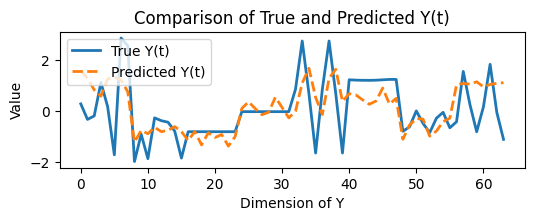

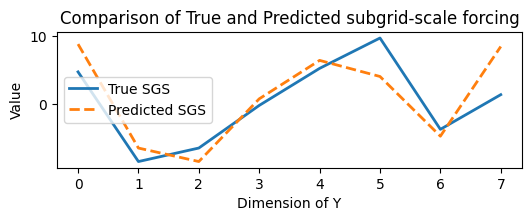

In [ ]:
# Test the network on a sample
sample_id = trainN + 50
sample_X = X_tensor_24[sample_id]  # Take the first sample
predicted_Y = net(sample_X.float().cuda()).detach().cpu().numpy()

compute_SGS = lambda K: np.sum(K.reshape(8, 8), axis=1)

predicted_SGS = compute_SGS(predicted_Y)
true_SGS = compute_SGS(Y_tensor_24[sample_id, :].numpy())


plt.figure(figsize=(6, 6))

plt.subplot(3,1,1)
plt.plot(Y_tensor_24[sample_id, :], label='True Y(t)', linewidth=2)
plt.plot(predicted_Y, '--', label='Predicted Y(t)', linewidth=2)
plt.title('Comparison of True and Predicted Y(t)')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.subplot(3,1,2)
plt.plot(true_SGS, label='True SGS', linewidth=2)
plt.plot(predicted_SGS, '--', label='Predicted SGS', linewidth=2)
plt.title('Comparison of True and Predicted subgrid-scale forcing')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()


## Retrain model

In [ ]:
batch_size = 100
trainN = 10000
# Train the network
num_epochs = 100
LOSS = []

for epoch in range(num_epochs):
    for iter in range (0, trainN, batch_size):
        batch_X = X_tensor_24[iter:iter+batch_size,:]
        batch_Y = Y_tensor_24[iter:iter+batch_size,:]
        optimizer.zero_grad()
        outputs = net(batch_X.cuda().float())
        loss = criterion(outputs, batch_Y.cuda().float())
        loss.backward()
        optimizer.step()
    LOSS.append(loss.detach().cpu().numpy())

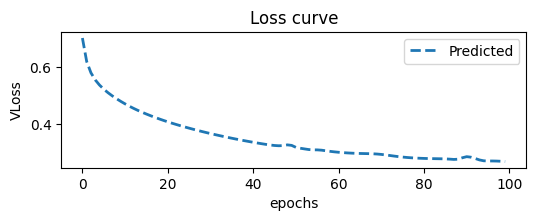

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(3,1,3)
plt.plot(LOSS, '--', label='Predicted', linewidth=2)
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('VLoss')
plt.legend()
plt.show()

## Analyze

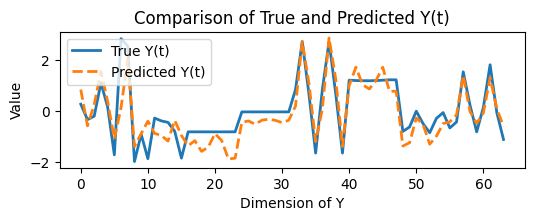

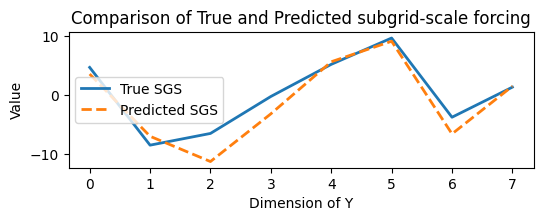

In [ ]:
# Test the network on a sample
sample_id = trainN + 50
sample_X = X_tensor_24[sample_id]  # Take the first sample
predicted_Y = net(sample_X.float().cuda()).detach().cpu().numpy()

compute_SGS = lambda K: np.sum(K.reshape(8, 8), axis=1)

predicted_SGS = compute_SGS(predicted_Y)
true_SGS = compute_SGS(Y_tensor_24[sample_id, :].numpy())


plt.figure(figsize=(6, 6))

plt.subplot(3,1,1)
plt.plot(Y_tensor_24[sample_id, :], label='True Y(t)', linewidth=2)
plt.plot(predicted_Y, '--', label='Predicted Y(t)', linewidth=2)
plt.title('Comparison of True and Predicted Y(t)')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.subplot(3,1,2)
plt.plot(true_SGS, label='True SGS', linewidth=2)
plt.plot(predicted_SGS, '--', label='Predicted SGS', linewidth=2)
plt.title('Comparison of True and Predicted subgrid-scale forcing')
plt.xlabel('Dimension of Y')
plt.ylabel('Value')
plt.legend()
plt.show()


# Part C

## Retrain the network on older data

In [ ]:
net = Net().cuda()

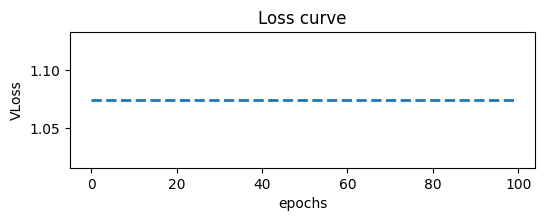

In [ ]:
batch_size = 100
trainN = 10000
# Train the network
num_epochs = 100
LOSS = []

for epoch in range(num_epochs):
    for iter in range (0, trainN, batch_size):
        batch_X = X_tensor[iter:iter+batch_size,:]
        batch_Y = Y_tensor[iter:iter+batch_size,:]
        optimizer.zero_grad()
        outputs = net(batch_X.cuda().float())
        loss = criterion(outputs, batch_Y.cuda().float())
        loss.backward()
        optimizer.step()
    LOSS.append(loss.detach().cpu().numpy())
plt.figure(figsize=(6, 6))
plt.subplot(3,1,3)
plt.plot(LOSS, '--', linewidth=2)
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('VLoss')
plt.show()

## Simulate problem

In [ ]:
X_init = x_store[0]
X_sim = [X_init]
Y_sim = []

minus = [-1, 0, 1, 2, 3, 4, 5, 6]
minus2 = [-2, -1, 0, 1, 2, 3, 4, 5]
plus = [1, 2, 3, 4, 5, 6, 7, 0]
plus2 = [2, 3, 4, 5, 6, 7, 0, 1]
h=.5
c=8
b=10
compute_SGS = lambda K: np.sum(K.reshape(8, 8), axis=1)
F=20

max_t = 10
dt = .005

for i in range(int(max_t/dt)):
  x_vec = X_sim[-1]
  y_vec = net(torch.tensor(x_vec).cuda().float()).detach().cpu().numpy()
  Y_sim.append(y_vec)

  x_minus = x_vec[minus]
  x_minus2 = x_vec[minus2]
  x_plus = x_vec[plus]
  dx = dt * (x_minus * (x_plus - x_minus2) - x_vec + F - (h * c / b) * compute_SGS(y_vec))
  new_x = dx + x_vec
  X_sim.append(new_x)

X_sim = np.array(X_sim)
Y_sim = np.array(Y_sim)

# X_sim = (X_sim-np.mean(X_sim))/np.std(X_sim)
# Y_sim = (Y_sim-np.mean(Y_sim))/np.std(Y_sim)


In [ ]:
X_actual = x_store[:len(X_sim)]
Y_actual = y_store[:len(Y_sim)]


l = 0

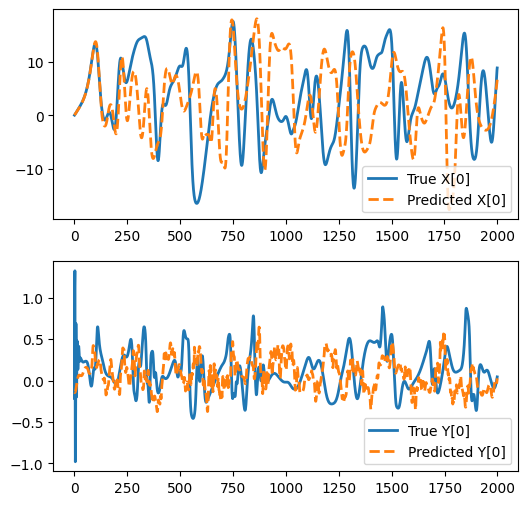

In [ ]:
plt.figure(figsize=(6, 6))
k = 0

plt.subplot(2,1,1)
plt.plot(X_actual[:,k], label=f'True X[{k}]', linewidth=2)
plt.plot(X_sim[:,k], '--', label=f'Predicted X[{k}]', linewidth=2)

plt.legend()

plt.subplot(2,1,2)
plt.plot(Y_actual[:,k], label=f'True Y[{k}]', linewidth=2)
plt.plot(Y_sim[:,k], '--', label=f'Predicted Y[{k}]', linewidth=2)
plt.legend()

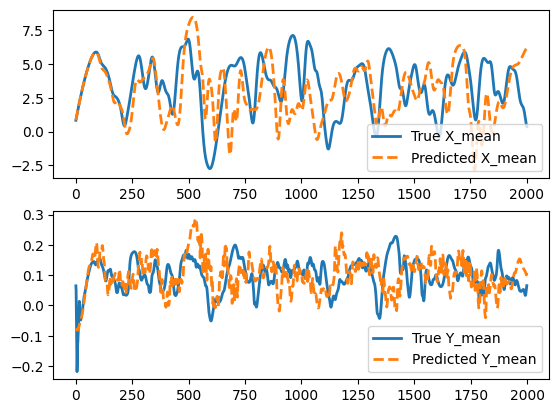

In [ ]:
X_sim_sums = np.mean(X_sim, axis=1)
Y_sim_sums = np.mean(Y_sim, axis=1)
X_actual_sums = np.mean(X_actual, axis=1)
Y_actual_sums = np.mean(Y_actual, axis=1)

plt.subplot(2,1,1)
plt.plot(X_actual_sums, label=f'True X_mean', linewidth=2)
plt.plot(X_sim_sums, '--', label=f'Predicted X_mean', linewidth=2)

plt.legend()

plt.subplot(2,1,2)
plt.plot(Y_actual_sums, label=f'True Y_mean', linewidth=2)
plt.plot(Y_sim_sums, '--', label=f'Predicted Y_mean', linewidth=2)
plt.legend()

Text(0, 0.5, 'Y-mean')

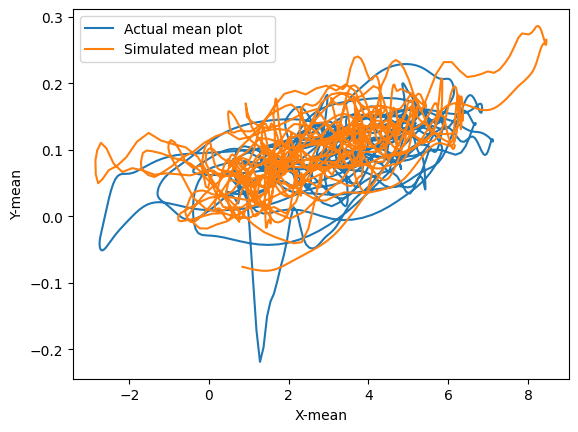

In [ ]:
plt.plot(X_actual_sums[:-1], Y_actual_sums, label="Actual mean plot")
plt.plot(X_sim_sums[:-1], Y_sim_sums, label="Simulated mean plot")
plt.legend()
plt.xlabel("X-mean")
plt.ylabel("Y-mean")



Text(0, 0.5, 'Y-mean')

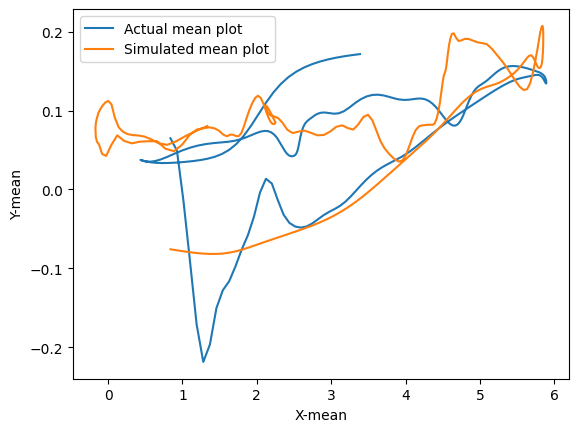

In [ ]:
plt.plot(X_actual_sums[:250], Y_actual_sums[:250], label="Actual mean plot")
plt.plot(X_sim_sums[:250], Y_sim_sums[:250], label="Simulated mean plot")
plt.legend()
plt.xlabel("X-mean")
plt.ylabel("Y-mean")
